In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt

config = "bruz"
if config == "ur1":
    sys.path.insert(0, "../")
    siepelDir = "C:/Users/pleroy/Documents/CAMILL/SER/WR15_v2"
elif config == "bruz":
    sys.path.insert(0, "/home/pleroy/DEV/DIADEM")
    siepelDir = "/home/pleroy/DATA/CAMILL/WR15_v2"

import toolsdiadem.tools as dia
import toolsdiadem.ser as ser
from toolsdiadem.ConfigSer2 import ConfigSer2

In [2]:
#%matplotlib qt5
%load_ext autoreload
%autoreload 2

In [3]:
cmap = 'jet'
conf15 = ConfigSer2(os.path.join(siepelDir, "wr15.ini"))
conf10 = ConfigSer2(os.path.join(siepelDir, "wr10.ini"))
vmin = conf10.vmin
vmax = conf10.vmax

In [4]:
dirWR15 = f"{conf15.out_path}/data"
dirWR10 = f"{conf10.out_path}/data"
prefix = f"{conf10.base_path}/processing/wr15_wr10/"

In [5]:
freq_WR15 = np.load( f"{dirWR15}/freq_WR15.npy" )
freq_WR10 = np.load( f"{dirWR10}/freq_WR10.npy" )
elevation_WR15 = np.load( f"{dirWR15}/elevation_WR15.npy" )
elevation_WR10 = np.load( f"{dirWR10}/elevation_WR10.npy" )

# Compare WR15 / WR10

In [6]:
dictOfMeasurements = {
    "A": (("20200701", "000_A"), ("20200709", "036_A")),
    "C": (("20200701", "001_C"), ("20200709", "037_C")),
    "E": (("20200701", "002_E"), ("20200715", "038_E")),
    "W": (("20200701", "003_W"), ("20200715", "040_W_v2")), # ("20200715", "039_W_u")
    "V": (("20200701", "004_V"), ("20200715", "041_V")),
    "G": (("20200701", "005_G"), ("20200715", "042_G")),
    "L": (("20200703", "006_L"), ("20200715", "043_L")),
    "M": (("20200703", "007_M"), ("20200715", "044_M")),
    "X": (("20200703", "008_X"), ("20200715", "045_X")),
    "H": (("20200703", "009_H"), ("20200716", "051_H")),
    "I": (("20200703", "010_I"), ("20200716", "050_I")),
    "K": (("20200703", "011_K"), ("20200715", "048_K")),
    "J": (("20200703", "012_J"), ("20200716", "049_J")),
    "O": (("20200703", "013_O"), ("20200715", "046_O")),
    "N": (("20200703", "014_N"), ("20200715", "047_N")),
    "AA": (("20200703", "015_AA"), ("20200716", "053_AA")),
    "Y": (("20200703", "016_Y"), ("20200716", "054_Y")),
    "AB": (("20200703", "017_AB"), ("20200716", "052_AB")),
    "Z": (("20200703", "018_Z"), ("20200716", "055_Z")),
    "AC": (("20200819", "065_AC"), ("20200818", "060_AC")),
    "AD": (("20200819", "066_AD"), ("20200818", "061_AD")),
}

wr15_to_wr10_date = 20200709
wr10_to_wr15_date = 20200818

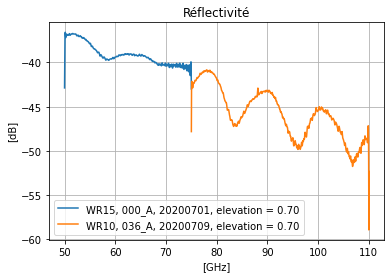

In [7]:
fig, ax = plt.subplots(1,1)
title = prefix

getMax = 0

for myAbs in dictOfMeasurements["A"]:
    date, absorbant = myAbs
    if int(date) < wr15_to_wr10_date or int(date) > wr10_to_wr15_date:
        # this is a WR15 measurement
        iWR15 = conf15.idxElevation
        reflectivite = np.load( f"{dirWR15}/reflectivite/{absorbant}_{date}.npy" )
        toPlot = reflectivite[iWR15, :]
        if getMax:
            toPlot = np.amax(np.abs(reflectivite), axis=0)
        ax.plot( freq_WR15, ser.dB( toPlot ), 
                label = f"WR15, {absorbant}, {date}, elevation = {elevation_WR15[iWR15]:.2f}" )
    else:
        # this is a WR10 measurement
        iWR10 = conf10.idxElevation
        reflectivite = np.load( f"{dirWR10}/reflectivite/{absorbant}_{date}.npy" )  
        toPlot = reflectivite[iWR10, :]
        if getMax:
            toPlot = np.amax(np.abs(reflectivite), axis=0)
        ax.plot( freq_WR10, ser.dB( toPlot ), 
                label = f"WR10, {absorbant}, {date}, elevation = {elevation_WR10[iWR10]:.2f}" )
    if title == prefix:
        if getMax:
            title = prefix + f"max/{absorbant}_{date}"
        else:
            title = prefix + f"{absorbant}_{date}"
    else:
        title = title + f"_{absorbant}_{date}"

ax.legend()
ax.grid()
ax.set_xlabel("[GHz]")
ax.set_ylabel("[dB]")
ax.set_title(f"Réflectivité")
if getMax:
    title += "_max"
fig.savefig(f"{title}.png")

# Compare all

In [8]:
for root, dirs, files in os.walk(prefix):
    for f in files:
        if f.endswith(".png"):
            os.remove(os.path.join(root, f)) # remove or unlink does the same

A, 2 measurements
C, 2 measurements
E, 2 measurements
W, 2 measurements
V, 2 measurements
G, 2 measurements
L, 2 measurements
M, 2 measurements
X, 2 measurements
H, 2 measurements
I, 2 measurements
K, 2 measurements
J, 2 measurements
O, 2 measurements
N, 2 measurements
AA, 2 measurements
Y, 2 measurements
AB, 2 measurements
Z, 2 measurements
AC, 2 measurements
AD, 2 measurements


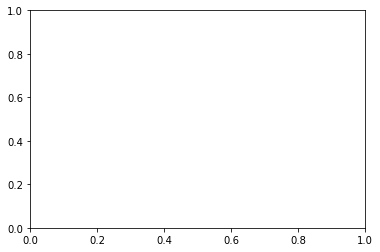

In [9]:
fig, ax = plt.subplots(1,1)

getMax = 1

for item in dictOfMeasurements.items():
    ref, tests = item
    title = prefix
    fig, ax = plt.subplots(1,1)
    print(f"{ref}, {len(tests)} measurements")
    for test in tests:
        date, absorbant = test
        if int(date) < wr15_to_wr10_date or int(date) > wr10_to_wr15_date:
            # this is a WR15 measurement
            iWR15 = conf15.idxElevation
            reflectivite = np.load( f"{dirWR15}/reflectivite/{absorbant}_{date}.npy" )
            toPlot = reflectivite[iWR15, :]
            if getMax:
                toPlot = np.amax(np.abs(reflectivite), axis=0)
            ax.plot( freq_WR15, ser.dB( toPlot ), 
                    label = f"WR15, {absorbant}, {date}, elevation = {elevation_WR15[iWR15]:.2f}" )
        else:
            # this is a WR10 measurement
            iWR10 = conf10.idxElevation
            reflectivite = np.load( f"{dirWR10}/reflectivite/{absorbant}_{date}.npy" )    
            toPlot = reflectivite[iWR10, :]
            if getMax:
                toPlot = np.amax(np.abs(reflectivite), axis=0)
            ax.plot( freq_WR10, ser.dB( toPlot ), 
                    label = f"WR10, {absorbant}, {date}, elevation = {elevation_WR10[iWR10]:.2f}" )
        if getMax:
            title = prefix + f"max/{absorbant}_{date}"
        else:
            title = prefix + f"elev_i/{absorbant}_{date}"
    ax.legend()
    ax.grid()
    ax.set_xlabel("[GHz]")
    ax.set_ylabel("[dB]")
    ax.set_title(f"Réflectivité")
    if getMax:
        title += "_max"
    fig.savefig(f"{title}.png")
    plt.close()

# Plot cmap

## One

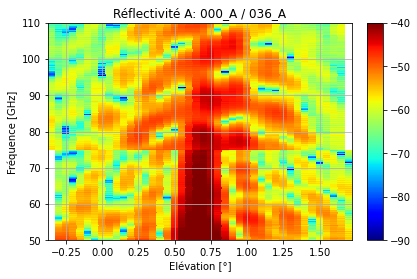

In [11]:
fig, ax = plt.subplots(1,1)
# wr15
idxWR15 = np.where(np.abs(freq_WR15 - conf15.centerFreq) < conf15.bandWidth)
idxAltWR15 = np.where(np.abs(freq_WR15 - conf15.centerFreq) >= conf15.bandWidth)
# wr10
idxWR10 = np.where(np.abs(freq_WR10 - conf10.centerFreq) < conf10.bandWidth)
idxAltWR10 = np.where(np.abs(freq_WR10 - conf10.centerFreq) >= conf10.bandWidth)

refAbs = "A"
meas0 = dictOfMeasurements[refAbs][0]
meas1 = dictOfMeasurements[refAbs][-1]

for meas in meas0, meas1:
    date, absorbant = meas
    if int(date) < wr15_to_wr10_date or int(date) > wr10_to_wr15_date:
        # this is a WR15 measurement
        reflectivite = np.load( f"{dirWR15}/reflectivite/{absorbant}_{date}.npy" )
        # drop lower and higher frequencies values
        toPlot = np.zeros(reflectivite.shape)
        toPlot[:,idxWR15]    = 20 * np.log10( 1e-12 + np.abs( reflectivite[:,idxWR15] ) )
        toPlot[:,idxAltWR15] = np.nan
        im = ax.pcolormesh(elevation_WR15, np.flip( freq_WR15 ), np.rot90(toPlot), cmap=cmap, vmin=vmin, vmax=vmax, shading='auto')
    else:
        # this is a WR10 measurement
        reflectivite = np.load( f"{dirWR10}/reflectivite/{absorbant}_{date}.npy" ) 
        # drop lower and higher frequencies values
        toPlot = np.zeros(reflectivite.shape)
        toPlot[:,idxWR10]    = 20 * np.log10( 1e-12 + np.abs( reflectivite[:,idxWR10] ) )
        toPlot[:,idxAltWR10] = np.nan
        im = ax.pcolormesh(elevation_WR10, np.flip( freq_WR10 ), np.rot90(toPlot), cmap=cmap, vmin=vmin, vmax=vmax, shading='auto')
    
title = f"Réflectivité {refAbs}: {meas0[1]} / {meas1[1]}"
ax.set_title(title)
ax.set_xlabel( "Elévation [°]" )
ax.set_ylabel( "Fréquence [GHz]" )
dia.addColorBar(  im, ax, aspect='auto' )
fig.savefig(f"{prefix}/pcolormesh/reflectivite_{refAbs}.png")

## All

In [13]:
idxWR15 = np.where(np.abs(freq_WR15 - conf15.centerFreq) < conf15.bandWidth)
idxAltWR15 = np.where(np.abs(freq_WR15 - conf15.centerFreq) >= conf15.bandWidth)

idxWR10 = np.where(np.abs(freq_WR10 - conf10.centerFreq) < conf10.bandWidth)
idxAltWR10 = np.where(np.abs(freq_WR10 - conf10.centerFreq) >= conf10.bandWidth)

for refAbs in dictOfMeasurements.keys():
    fig, ax = plt.subplots(1,1)
    meas0 = dictOfMeasurements[refAbs][0]
    meas1 = dictOfMeasurements[refAbs][-1]
    for meas in meas0, meas1:
        date, absorbant = meas
        print(f"{absorbant}_{date}")
        if int(date) < wr15_to_wr10_date or int(date) > wr10_to_wr15_date:
            # this is a WR15 measurement
            reflectivite = np.load( f"{dirWR15}/reflectivite/{absorbant}_{date}.npy" )
            # drop lower and higher frequencies values
            toPlot = np.zeros(reflectivite.shape)
            toPlot[:,idxWR15]    = 20 * np.log10( 1e-12 + np.abs( reflectivite[:,idxWR15] ) )
            toPlot[:,idxAltWR15] = np.nan
            im = ax.pcolormesh( elevation_WR15, np.flip( freq_WR15 ), np.rot90(toPlot), cmap=cmap, vmin=vmin, vmax=vmax, shading='auto')
        else:
            # this is a WR10 measurement
            reflectivite = np.load( f"{dirWR10}/reflectivite/{absorbant}_{date}.npy" ) 
            # drop lower and higher frequencies values
            toPlot = np.zeros(reflectivite.shape)
            toPlot[:,idxWR10]    = 20 * np.log10( 1e-12 + np.abs( reflectivite[:,idxWR10] ) )
            toPlot[:,idxAltWR10] = np.nan
            im = ax.pcolormesh( elevation_WR10, np.flip( freq_WR10 ), np.rot90(toPlot), cmap=cmap, vmin=vmin, vmax=vmax, shading='auto')
    
    title = f"Réflectivité {refAbs}: {meas0[1]} / {meas1[1]}"
    ax.set_title(title)
    ax.set_xlabel( "Elévation [°]" )
    ax.set_ylabel( "Fréquence [GHz]" )
    dia.addColorBar(  im, ax, aspect='auto' )
    fig.savefig(f"{prefix}/pcolormesh/reflectivite_{refAbs}.png")
    plt.close()

000_A_20200701
036_A_20200709
001_C_20200701
037_C_20200709
002_E_20200701
038_E_20200715
003_W_20200701
040_W_v2_20200715
004_V_20200701
041_V_20200715
005_G_20200701
042_G_20200715
006_L_20200703
043_L_20200715
007_M_20200703
044_M_20200715
008_X_20200703
045_X_20200715
009_H_20200703
051_H_20200716
010_I_20200703
050_I_20200716
011_K_20200703
048_K_20200715
012_J_20200703
049_J_20200716
013_O_20200703
046_O_20200715
014_N_20200703
047_N_20200715
015_AA_20200703
053_AA_20200716
016_Y_20200703
054_Y_20200716
017_AB_20200703
052_AB_20200716
018_Z_20200703
055_Z_20200716
065_AC_20200819
060_AC_20200818
066_AD_20200819
061_AD_20200818


# Remove all

In [ ]:
for root, dirs, files in os.walk(f"{prefix}"):
    for f in files:
        if f.endswith(".png") or f.endswith(".npy"):
            os.remove(os.path.join(root, f)) # remove or unlink does the same

In [14]:
prefix

'/home/pleroy/DATA/CAMILL/WR15_v2/processing/wr15_wr10/'